In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

chess=pd.read_csv('./krkopt.data',header=None)
x=chess.iloc[:,:6]
y=chess.iloc[:,-1]

# 将前6列数据中的字母“a、b、c、d、e、f、g、h”分别替换为数字“1、2、3、4、5、6、7、8”
x.replace([chr(i) for i in range(97,123)],range(1,27),inplace=True)

# 对前6列数据进行标准差标准化
standard_scaler=preprocessing.StandardScaler()
x=pd.DataFrame(standard_scaler.fit_transform(x))

# 将最后一列数据中的“draw”替换为1，其他值替换为-1
y=y.apply(lambda str:1 if str=='draw' else -1)

In [2]:
from sklearn.model_selection import train_test_split

x_trainval,x_test,y_trainval,y_test = train_test_split(x,y,test_size=0.8)
x_train,x_val,y_train,y_val = train_test_split(x_trainval,y_trainval,train_size=0.7)

print('training set:',x_train.shape)
print('validation set:',x_val.shape)
print('testing set:',x_test.shape)

training set: (3927, 6)
validation set: (1684, 6)
testing set: (22445, 6)


In [3]:

from sklearn.svm import SVC

best_score=0.0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm=SVC(gamma=gamma, C=C)
        svm.fit(x_train,y_train)
        score=svm.score(x_val,y_val)
        if score>best_score:
            best_score=score
            best_parameters={'gamma':gamma,'C':C}
            
svm=SVC(**best_parameters)
svm.fit(x_train,y_train)
print('test_score:',svm.score(x_test,y_test))
print('best_parameters:',best_parameters)

test_score: 0.9933615504566718
best_parameters: {'gamma': 0.1, 'C': 100}


In [8]:
from sklearn.metrics import precision_score,recall_score,f1_score
y_pred=svm.predict(x_test)
print("precision_score: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

precision_score:  0.9560487380330722
recall_score:  0.978619153674833
f1_score:  0.9672022892361876


[-19.30575721 -21.71837389  -8.46253124 ...  -3.20085778 -24.57689722
  -7.65179052]
auc 0.9978110432424089


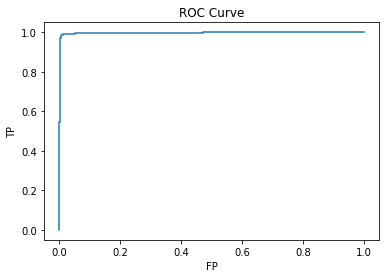

In [11]:
from sklearn.metrics import roc_curve,auc

y_score=svm.decision_function(x_test)
print(y_score)

fpr,tpr,threshold=roc_curve(y_test,y_score)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("FP")
plt.ylabel("TP")
plt.title("ROC Curve")

print("auc",auc(fpr,tpr))

In [ ]:
impo